# notebook 2 - celltype annotation and beyond

This notebook will introduce you to the process of celltype annotation and give you a brief outlook of some of the analysis you can do with single-cell data in scanpy & besca.

In [1]:
#import necessary python packages
import scanpy.api as sc #software suite of tools for single-cell analysis in python
import besca as bc #internal BEDA package for single cell analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

sc.logging.print_versions() #output an overview of the software versions that are loaded

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==0.24.1 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
from IPython.display import HTML
task = "<style>div.task { background-color: #ffc299; border-color: #ff944d; border-left: 7px solid #ff944d; padding: 1em;} </style>"
HTML(task)

In [3]:
tag = "<style>div.tag { background-color: #99ccff; border-color: #1a8cff; border-left: 7px solid #1a8cff; padding: 1em;} </style>"
HTML(tag)

In [4]:
FAIR = "<style>div.fair { background-color: #d2f7ec; border-color: #d2f7ec; border-left: 7px solid #2fbc94; padding: 1em;} </style>"
HTML(FAIR)

## Dataset

Here we will reload our previously completely processed dataset.

In [5]:
#adata = sc.read('/tmp/adata_pbmc_FRESH_processed.h5ad')
adata = bc.datasets.pbmc_storage_processed()
adata.obs.drop(columns=['celltype'], inplace=True)


In [6]:
adata

AnnData object with n_obs × n_vars = 27901 × 1433 
    obs: 'CELL', 'CONDITION', 'experiment', 'sample_type', 'storage_condition', 'donor', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'louvain'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads', 'mean', 'mean_log1p', 'coeffvar', 'coeffvar_log1p'
    uns: 'donor_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'storage_condition_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

## Celltype annotation

### manual cell annotation based on the expression of known marker genes

In [7]:
#define genes (in future you will be able to access genesets from a central database GEMS)
b_cells = ['CD19', 'CD79A', 'MS4A1']
t_cells = ['CD3E', 'CD3G', 'CD3D']
t_cell_subsets = ['CD4', 'CD8A', 'CD8B']
naive_t_cell = ['SELL', 'CCR7', 'IL7R']
myeloid_cells = ['S100A8', 'S100A9', 'CST3']
monocytes = ['FCGR3A', 'FCGR3B', 'CD14'] #FCGR3A/B = CD16
dendritic_cells = ['FCER1A', 'ITGAM', 'ITGAX'] #ITGAM = CD11b #ITGAX= CD11c 
NK_cells = ['NCAM1', 'NKG7', 'CD3G']

<div class="tag">
We always use the HGNC symbols of genes as the main annotation type in the AnnData object since they are the most practical to work with. In addition, the ensemble IDs of all genes is saved in adata.var according to our FAIR standard and always written out since Ensembl IDs stay very robust over time.

Based on the dataset the marker genes that are expressed may vary strongly.
    
</div>

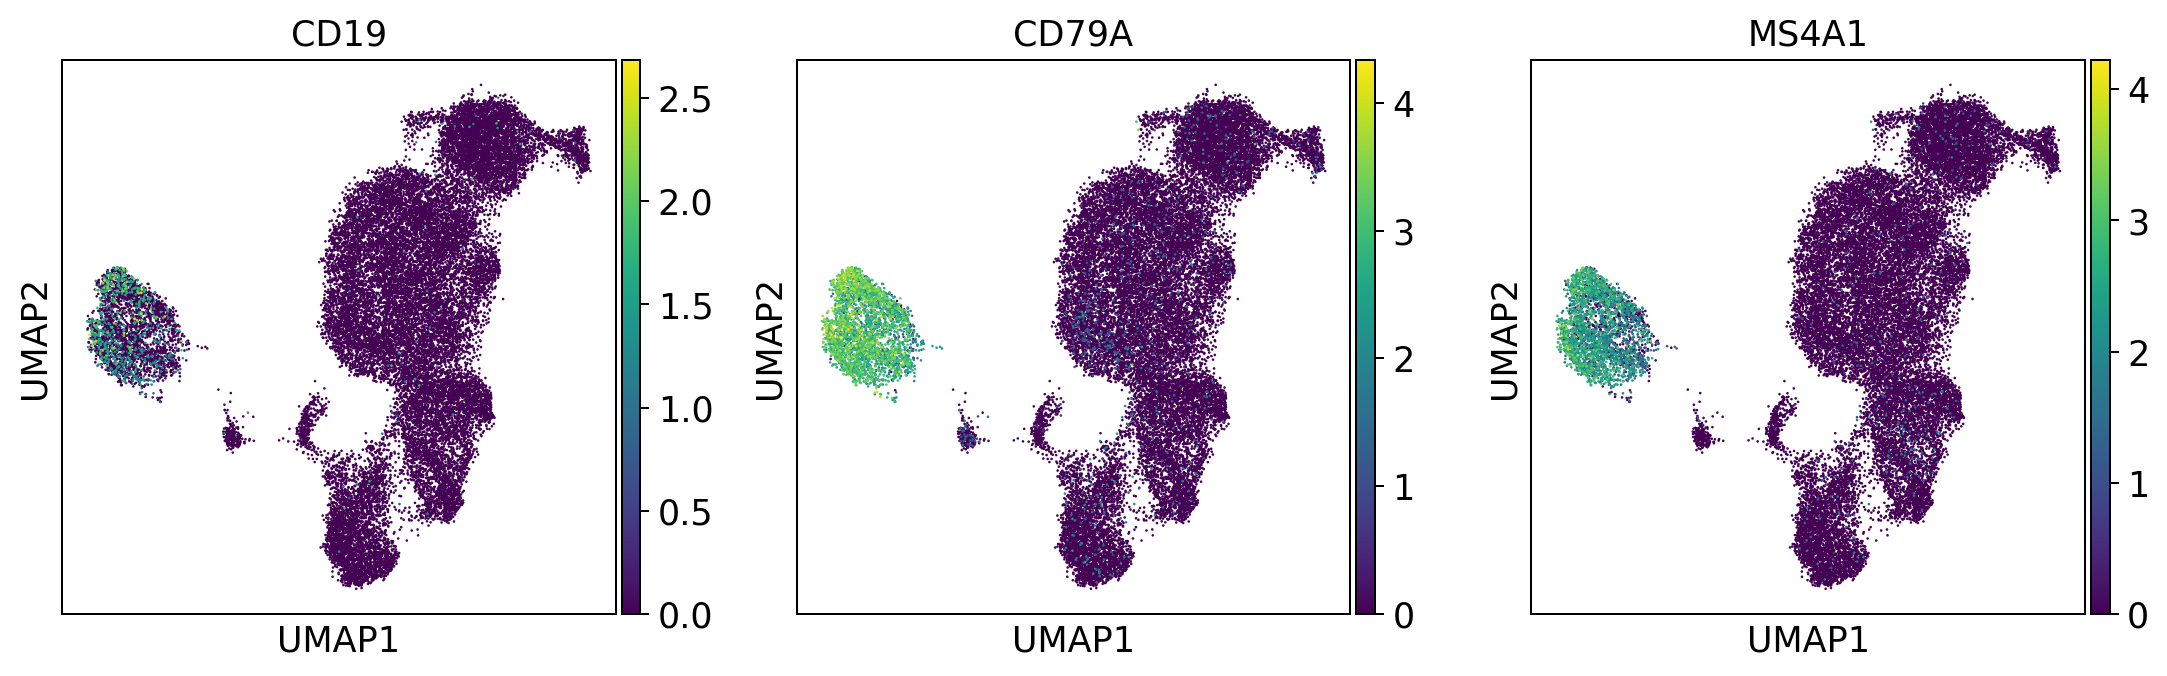

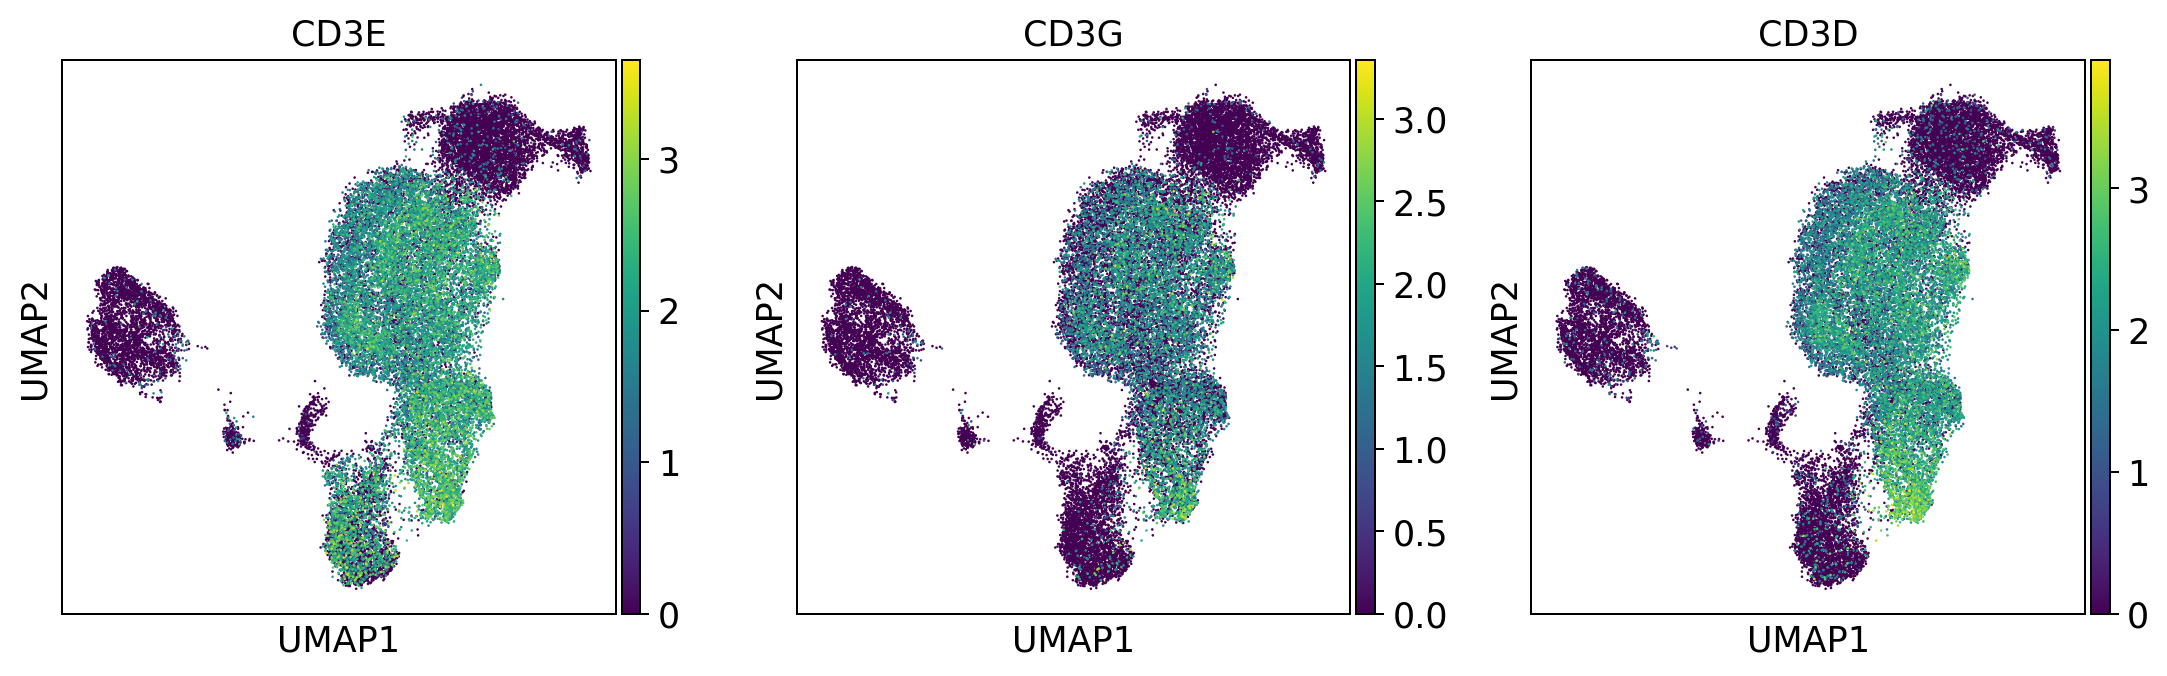

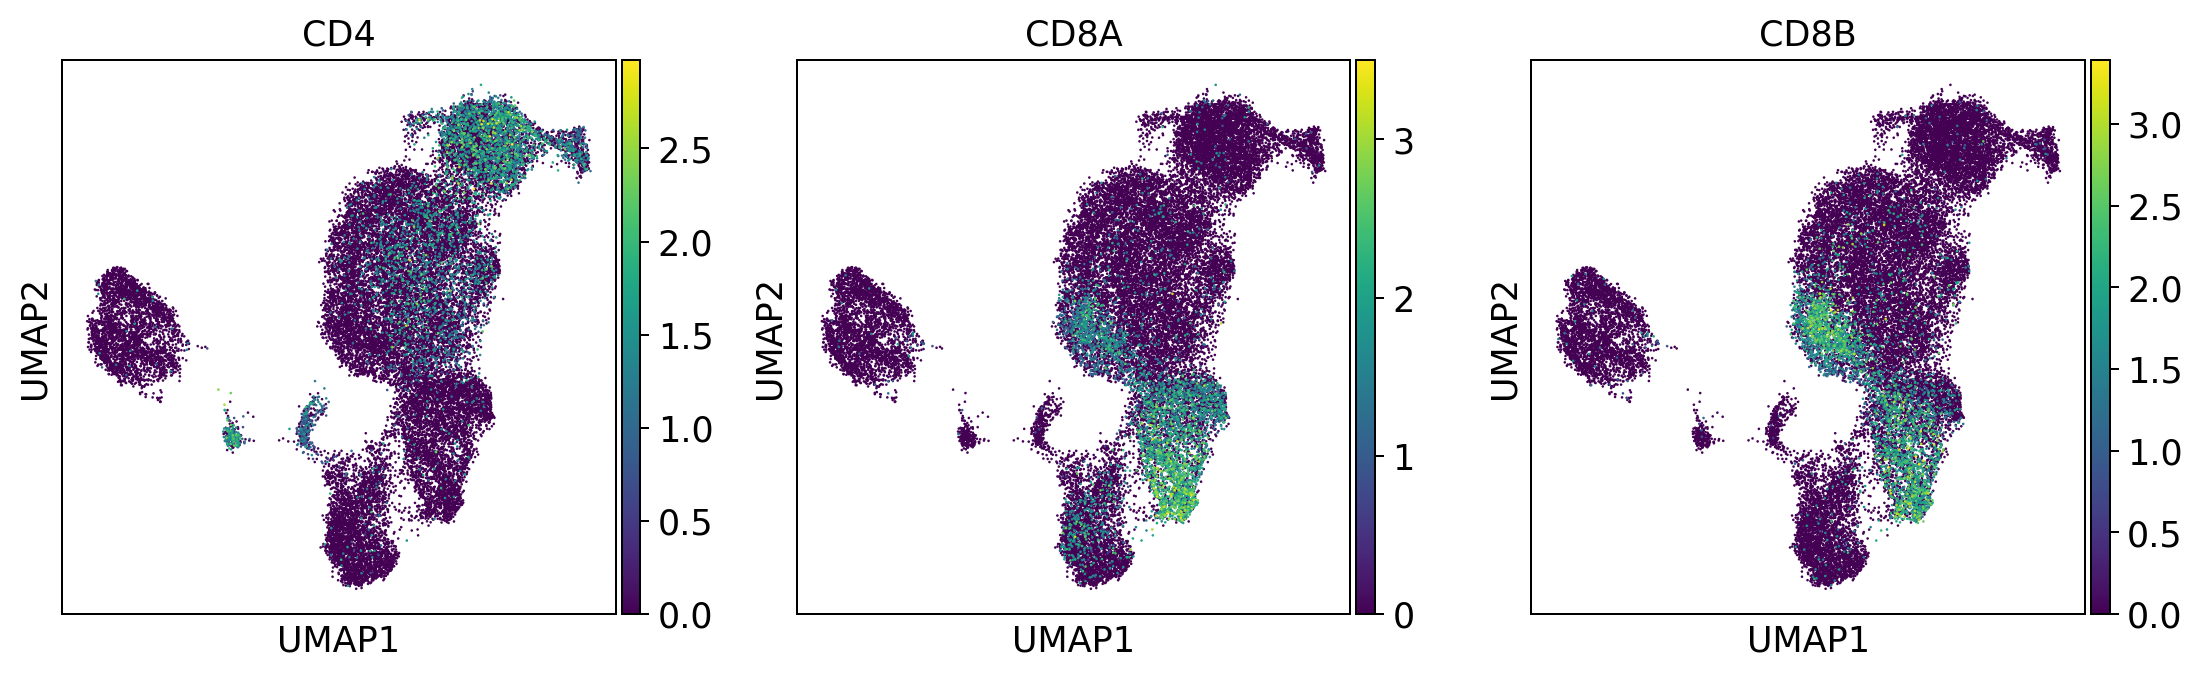

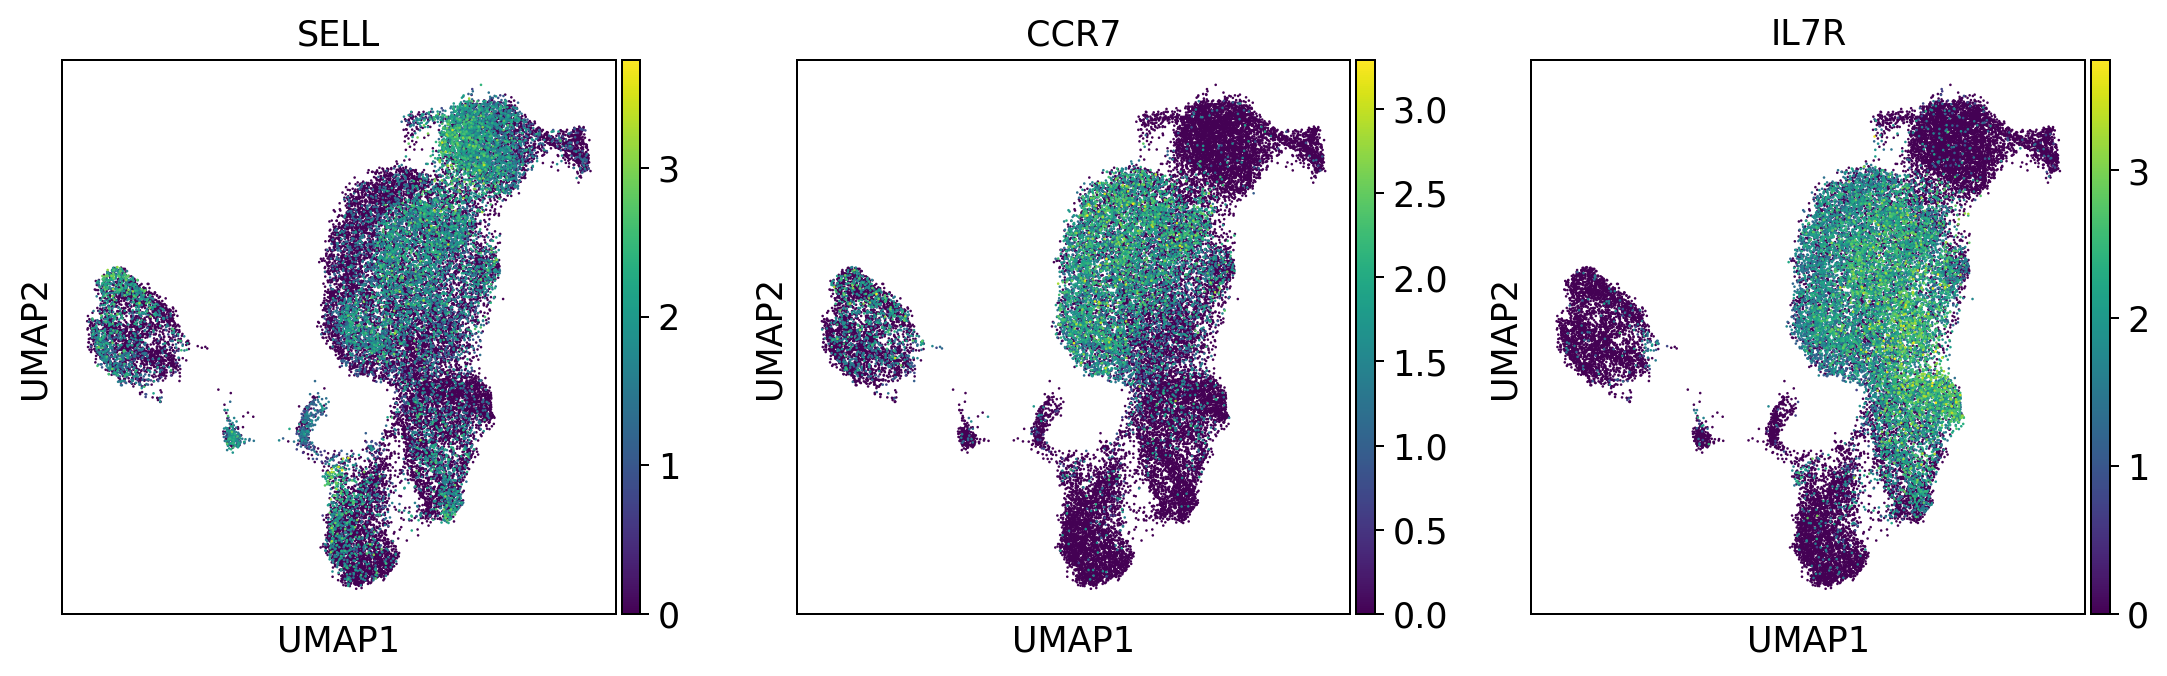

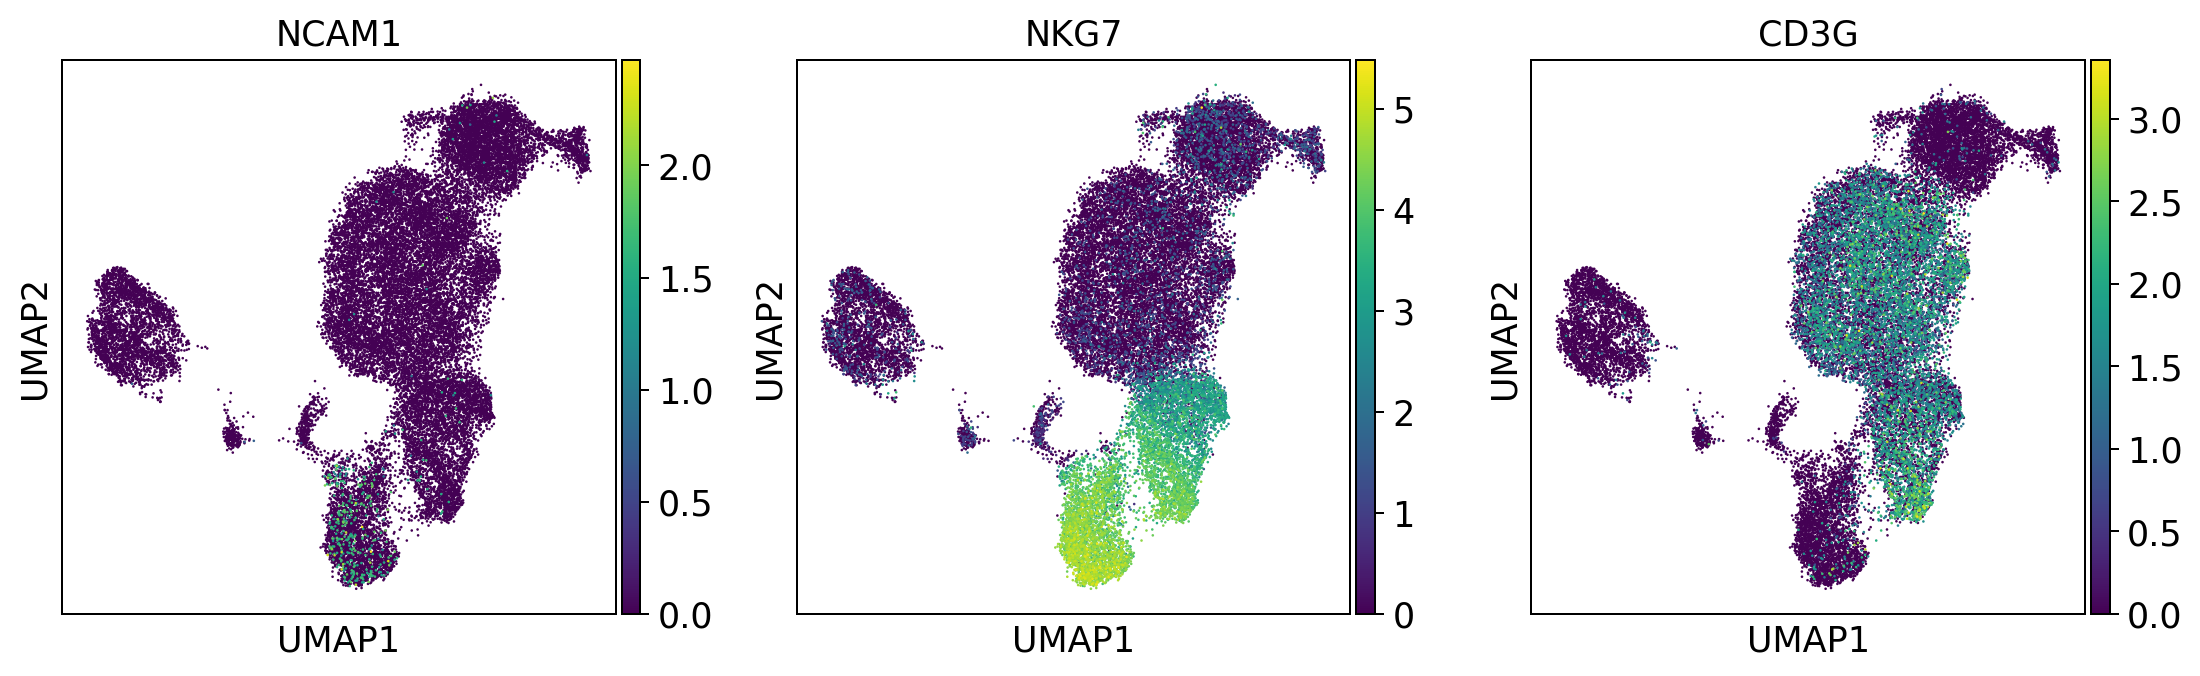

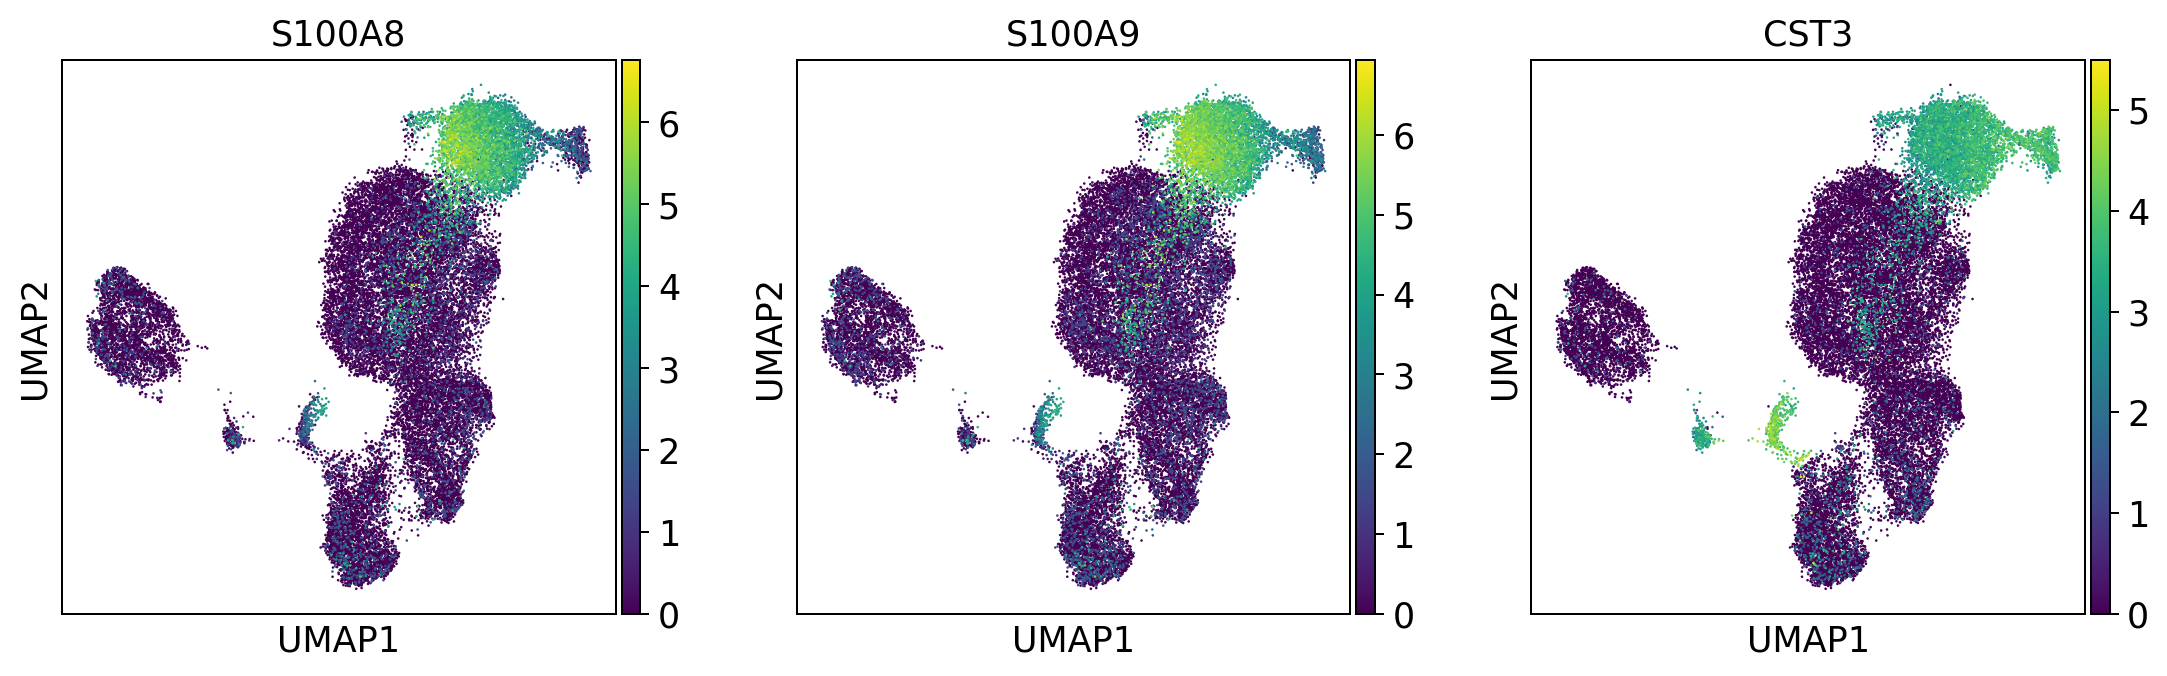

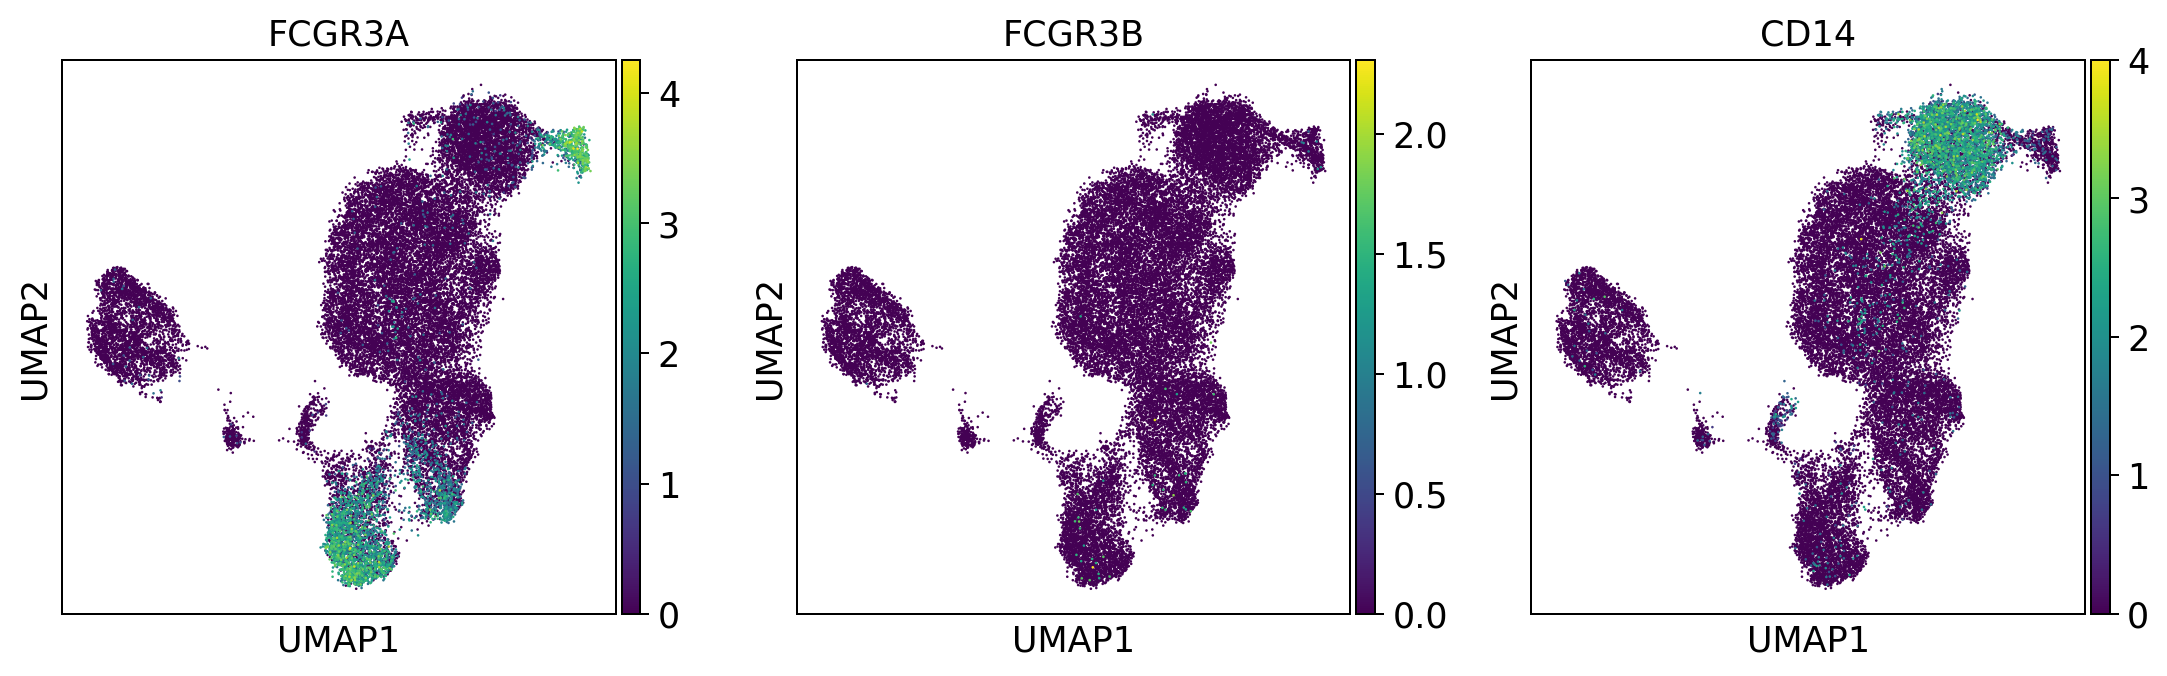

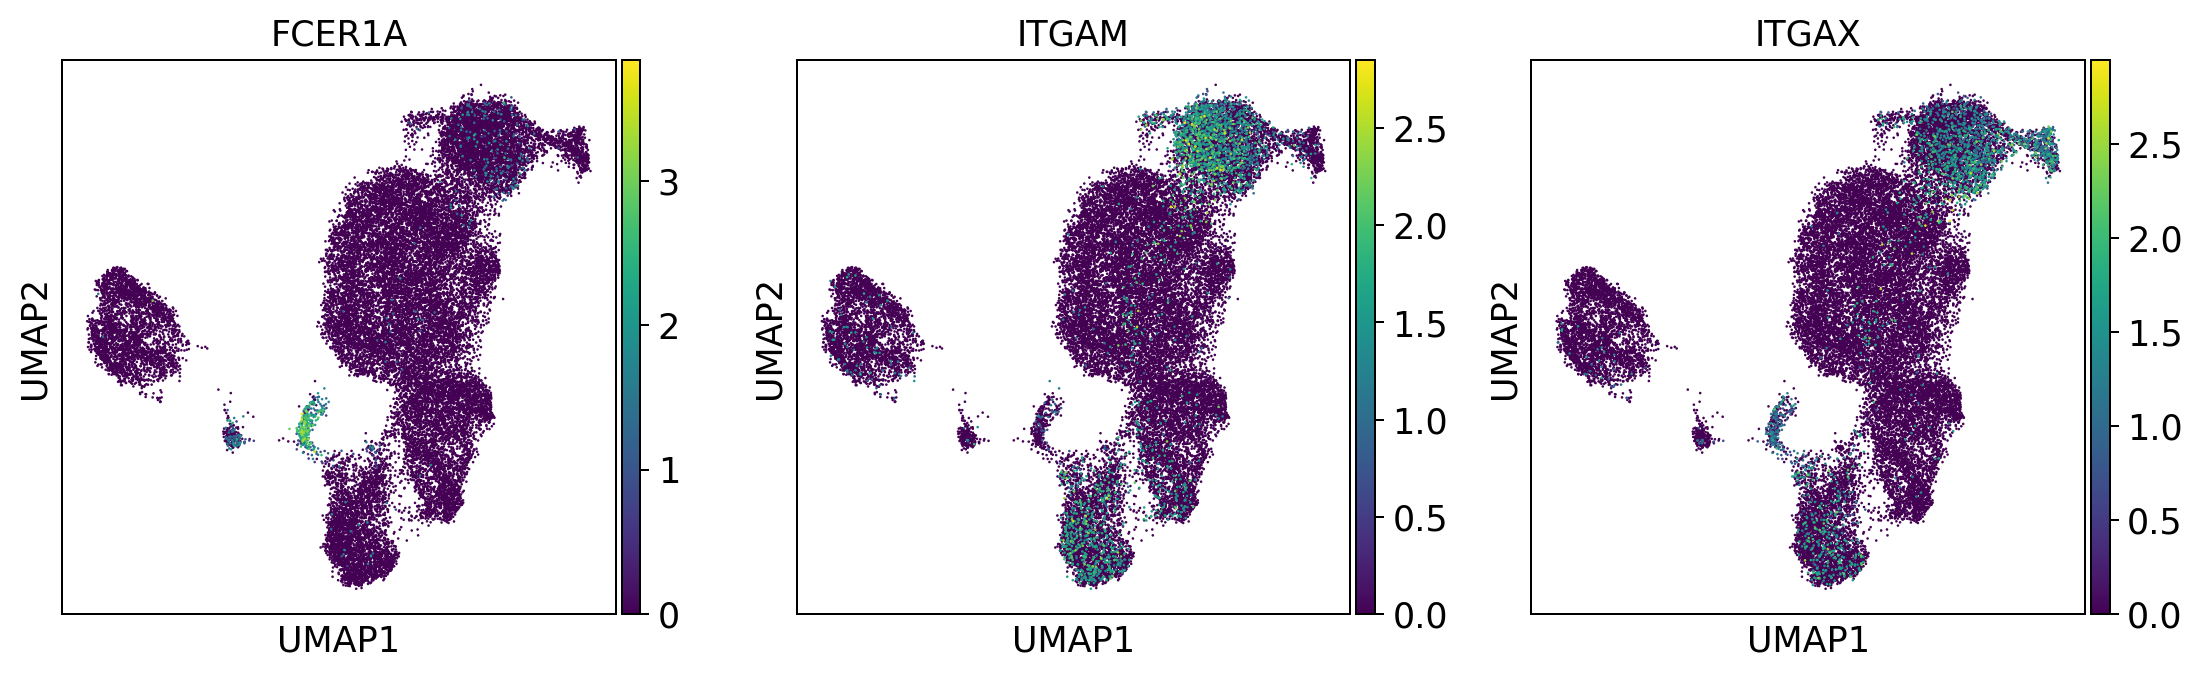

In [8]:
sc.settings.set_figure_params(dpi=90)
#visualize the gene expression as an overlay of the umap
#(this way you can visually identify the clusters with a high expression))
sc.pl.umap(adata, color = b_cells, color_map = 'viridis', ncols = 3)
sc.pl.umap(adata, color = t_cells, color_map = 'viridis', ncols = 3)
sc.pl.umap(adata, color = t_cell_subsets, color_map = 'viridis', ncols = 3)
sc.pl.umap(adata, color = naive_t_cell, color_map = 'viridis', ncols = 3)
sc.pl.umap(adata, color = NK_cells,  color_map = 'viridis',ncols = 3)
sc.pl.umap(adata, color = myeloid_cells,  color_map = 'viridis',ncols = 3)
sc.pl.umap(adata, color = monocytes, color_map = 'viridis', ncols = 3)
sc.pl.umap(adata, color = dendritic_cells, color_map = 'viridis', ncols = 3)

<div class="tag">
Per default scanpy plots the gene expression values saved in adata.raw (this means log1p(cp10k)). This is the reason that we can visualize all of these genes even if they are not contained in the highly variable genes.
</div>

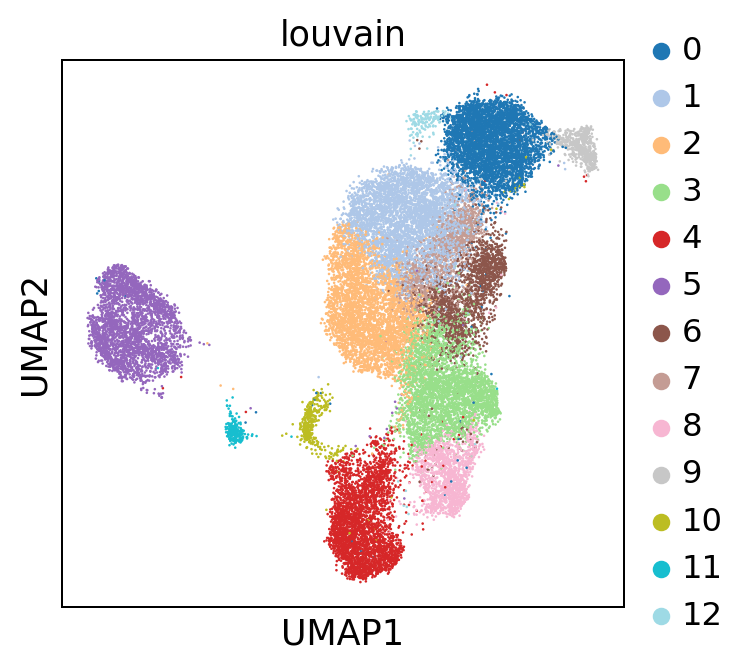

In [9]:
sc.pl.umap(adata, color = 'louvain', palette = 'tab20')

In [10]:
#write down new cluster names (important order needs to be equivalent to above)
#will label the cell types:

new_cluster_names = ['CD14+ monocyte', #0
                     'CD4 T-cell', #1
                     'CD8 T-cell', #2
                     'CD8 T-cell', #3
                     'NK cell', #4
                     'B-cell', #5
                     'CD4 T-cell', #6
                     'CD4 T-cell', #7
                     'CD8 T-cell', #8
                     'FCGR3A+ monocyte', #9
                     'pDC', #10
                     'unknown', #11
                     'CD14+ monocyte'] #12

bc.tl.annotate_cells_clustering(adata=adata, clustering_label='louvain', new_annotation_label='celltype', new_cluster_labels=new_cluster_names)

<div class="tag">
There are also more advanced methods of cell annotation where mixed clusters (i.e. clusters that contain more than one celltype) can be reclustered seperately and then annoated. Please refer to besca's documentation for more information. 
</div>

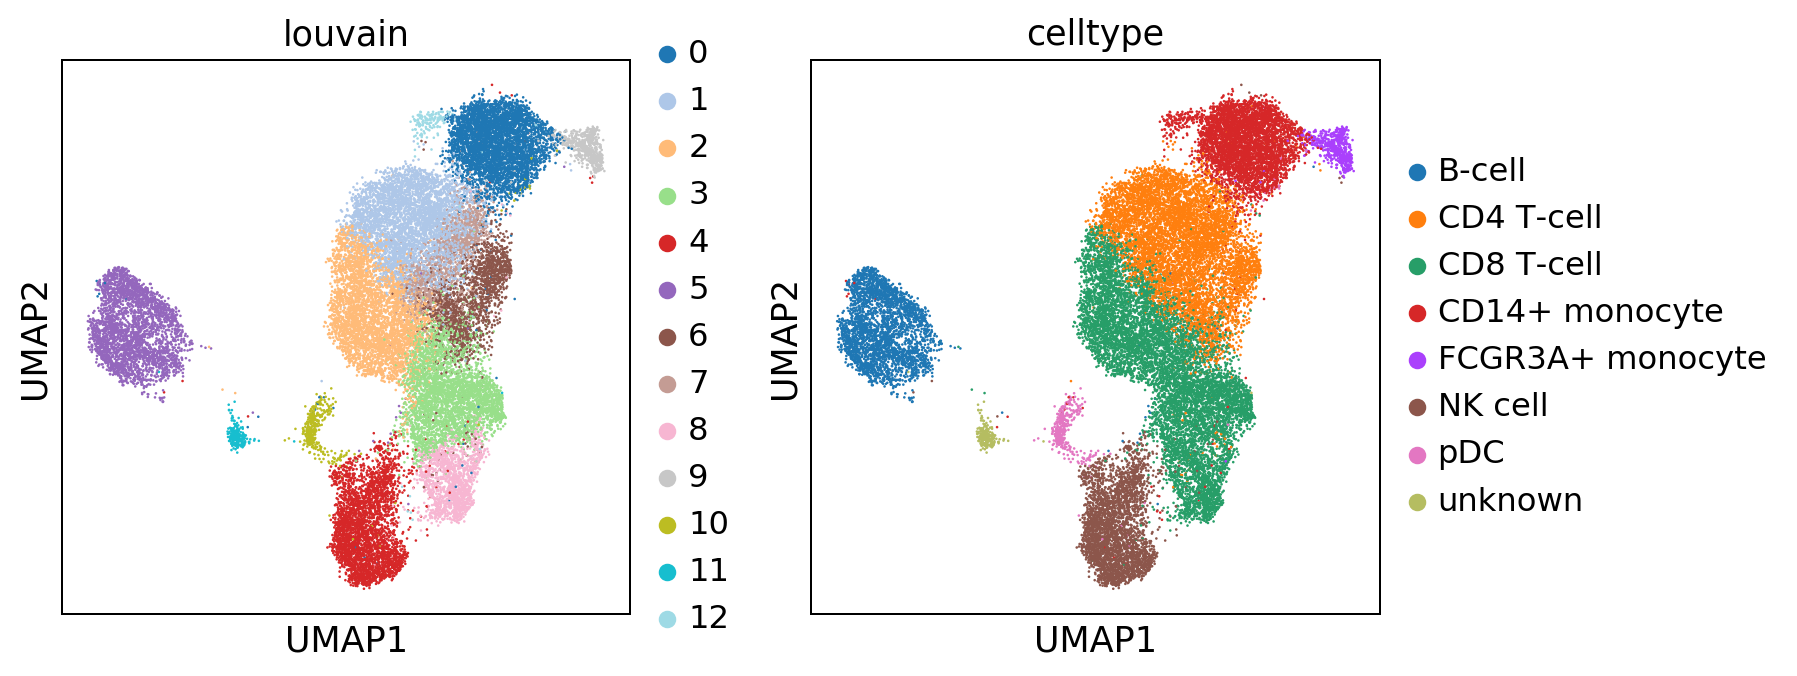

In [11]:
sc.pl.umap(adata, color = ['louvain', 'celltype'], wspace = 0.2)

<div class="tag">
Several clusters have been combined into one celltype. Here only a very rudimentary celltype annotation was performed. Depending on the dataset and the type of analysis this can become far more complex and detailled. 
</div>

<div class="fair">
write out celltype annotation  
`bc.st.export_celltype(adata=adata, basepath='FILEPATH_TO_FOLDER_CONTAINING_RAW_SUBFOLDER')`
</div>

In [12]:
bc.st.export_celltype(adata=adata, basepath='/tmp/dataset_introduction/')

mapping of cells to  celltype exported successfully to cell2labels.tsv
average.gct exported successfully to file
fract_pos.gct exported successfully to file
labelinfo.tsv successfully written out


<div class="tag">
Here we write out the celltype annotation so that we can use reload it in later analysis steps. There is a correspondng besca function for reloading the annotation.
</div>

In [13]:
#save AnnData Object for comparision purposes
adata.write('/tmp/dataset_introduction/adata_pbmc_FRESH_processed_annotated.h5ad')

## unbiased marker genes for each cluster

In [14]:
#perform differential gene expression between each louvain cluster and all other cells using scanpy
sc.tl.rank_genes_groups(adata, groupby='celltype')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, CD4 T-cell, CD8 T-cell, etc.


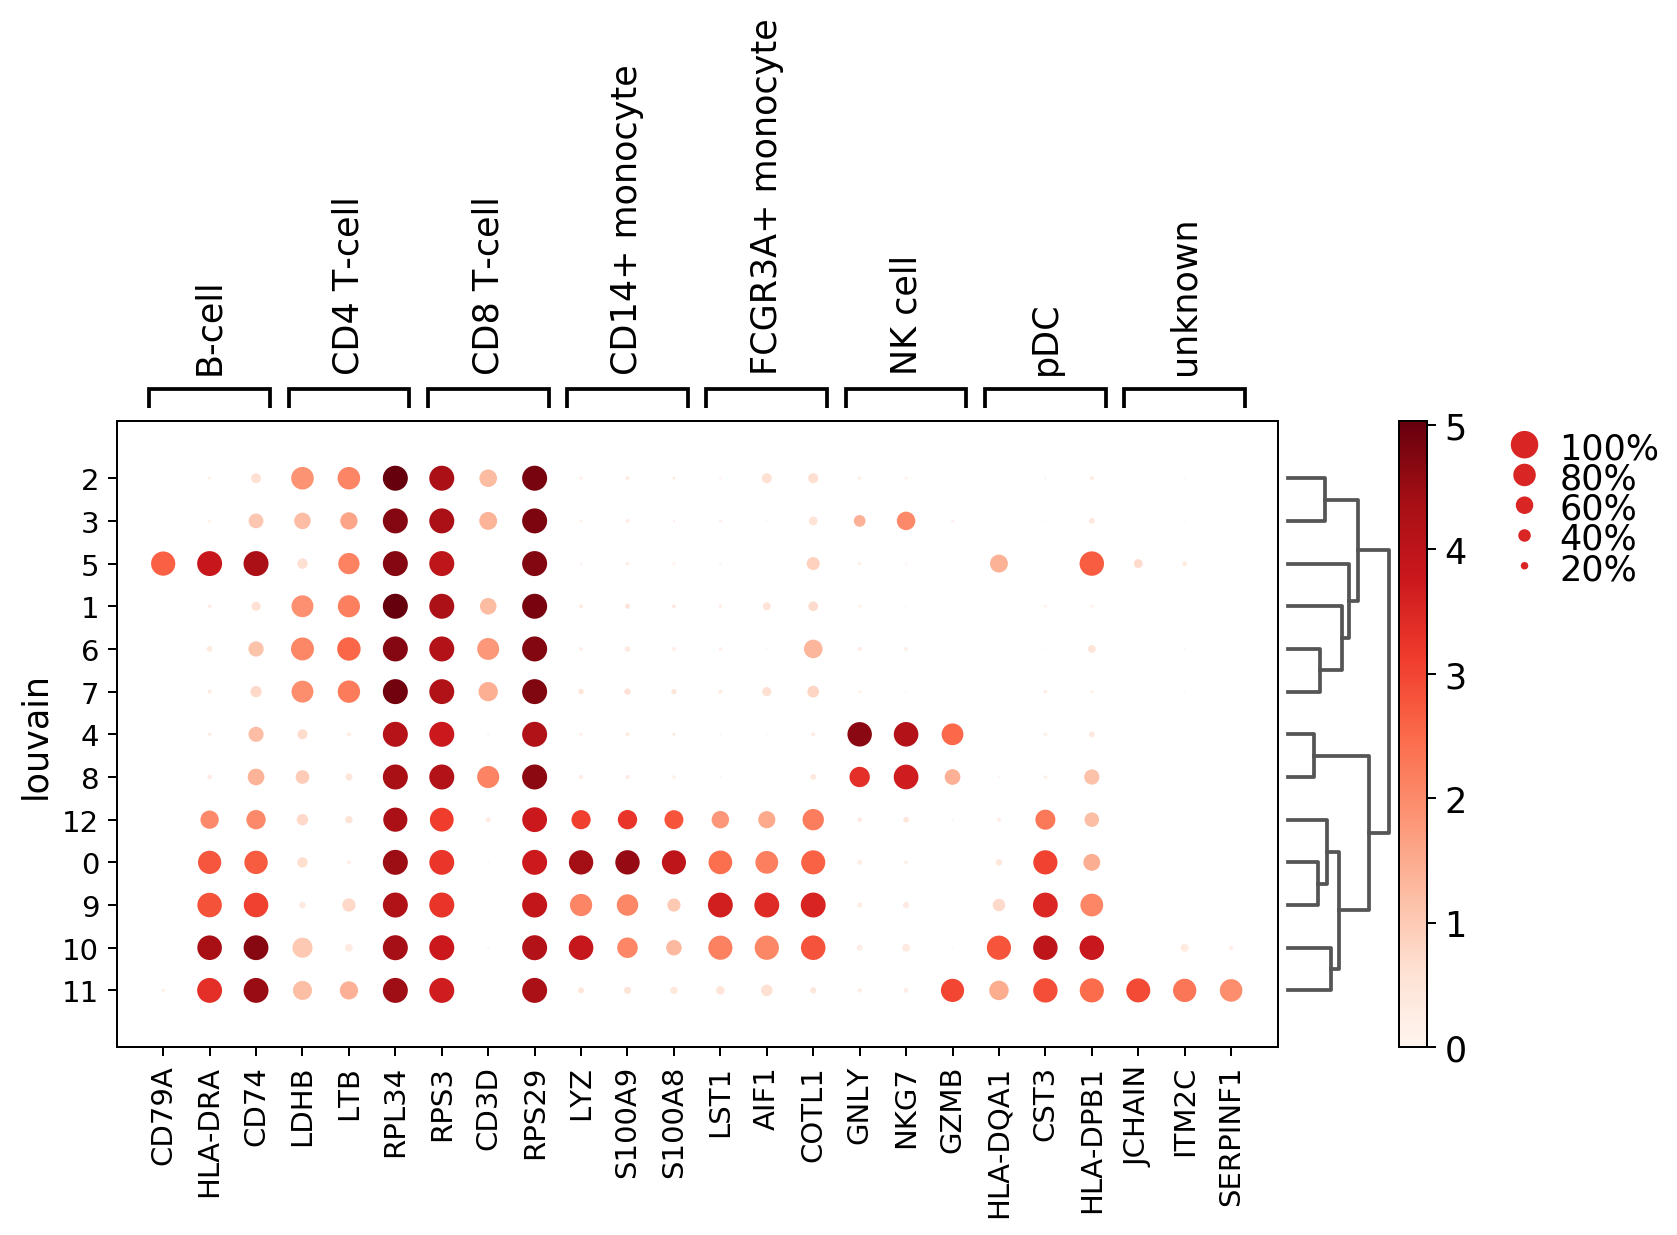

In [15]:
#visualize the top 3 marker genes as a dot plot
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3, groupby = 'louvain')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, CD4 T-cell, CD8 T-cell, etc.


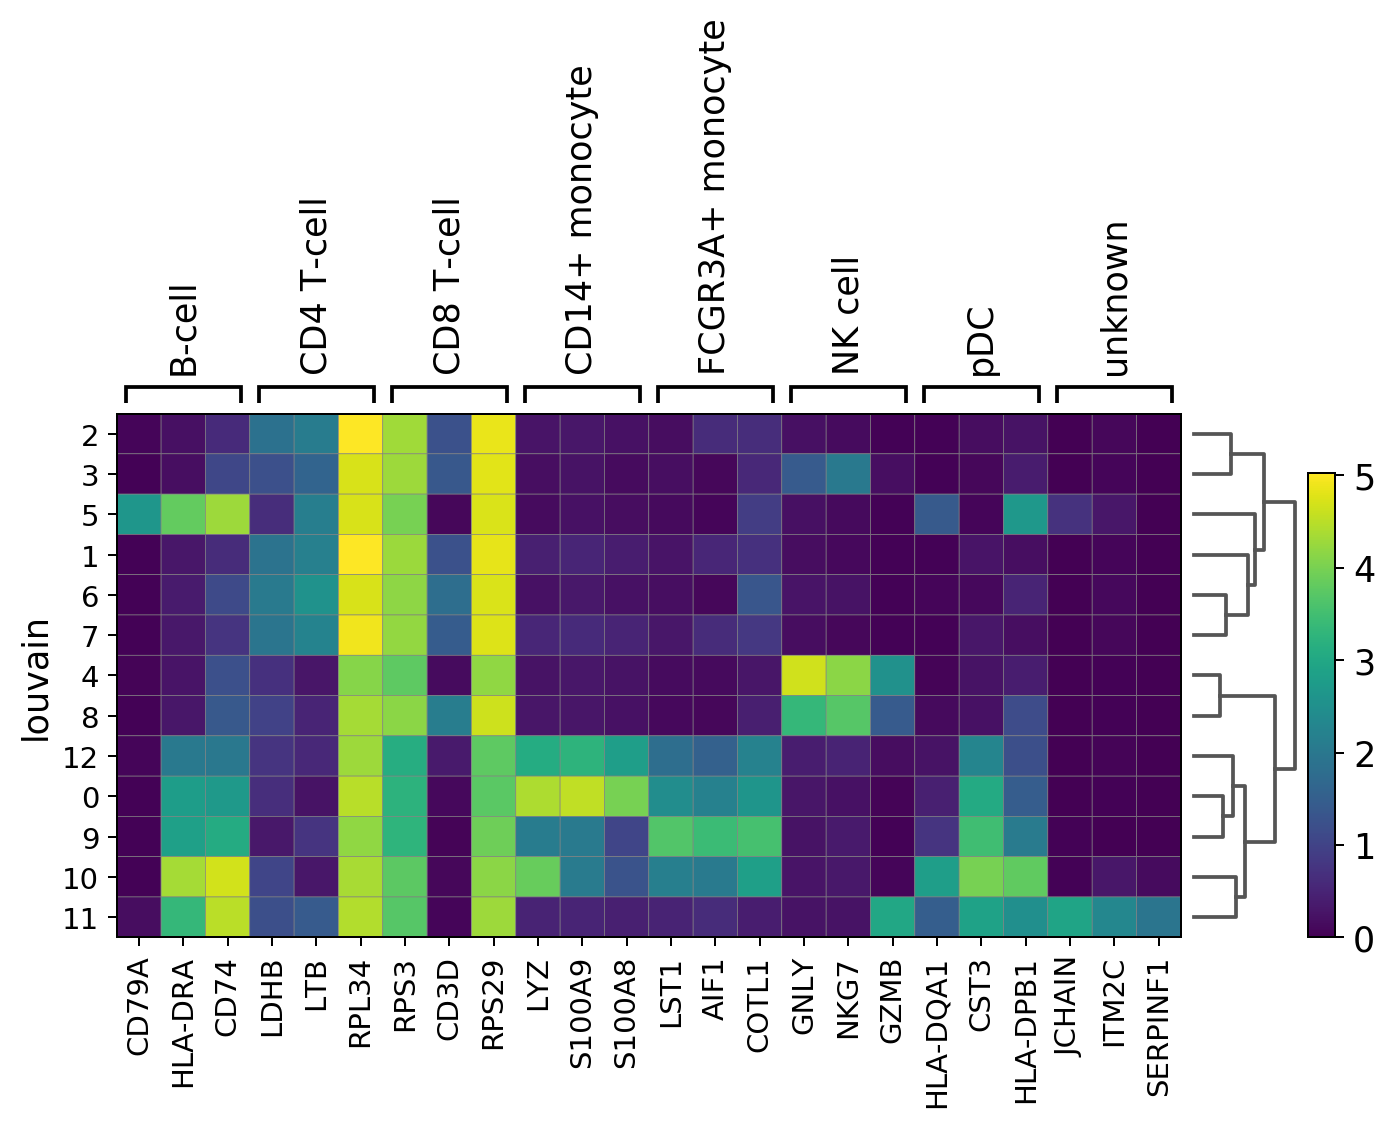

In [16]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=3, use_raw=True, groupby = 'louvain')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, CD4 T-cell, CD8 T-cell, etc.


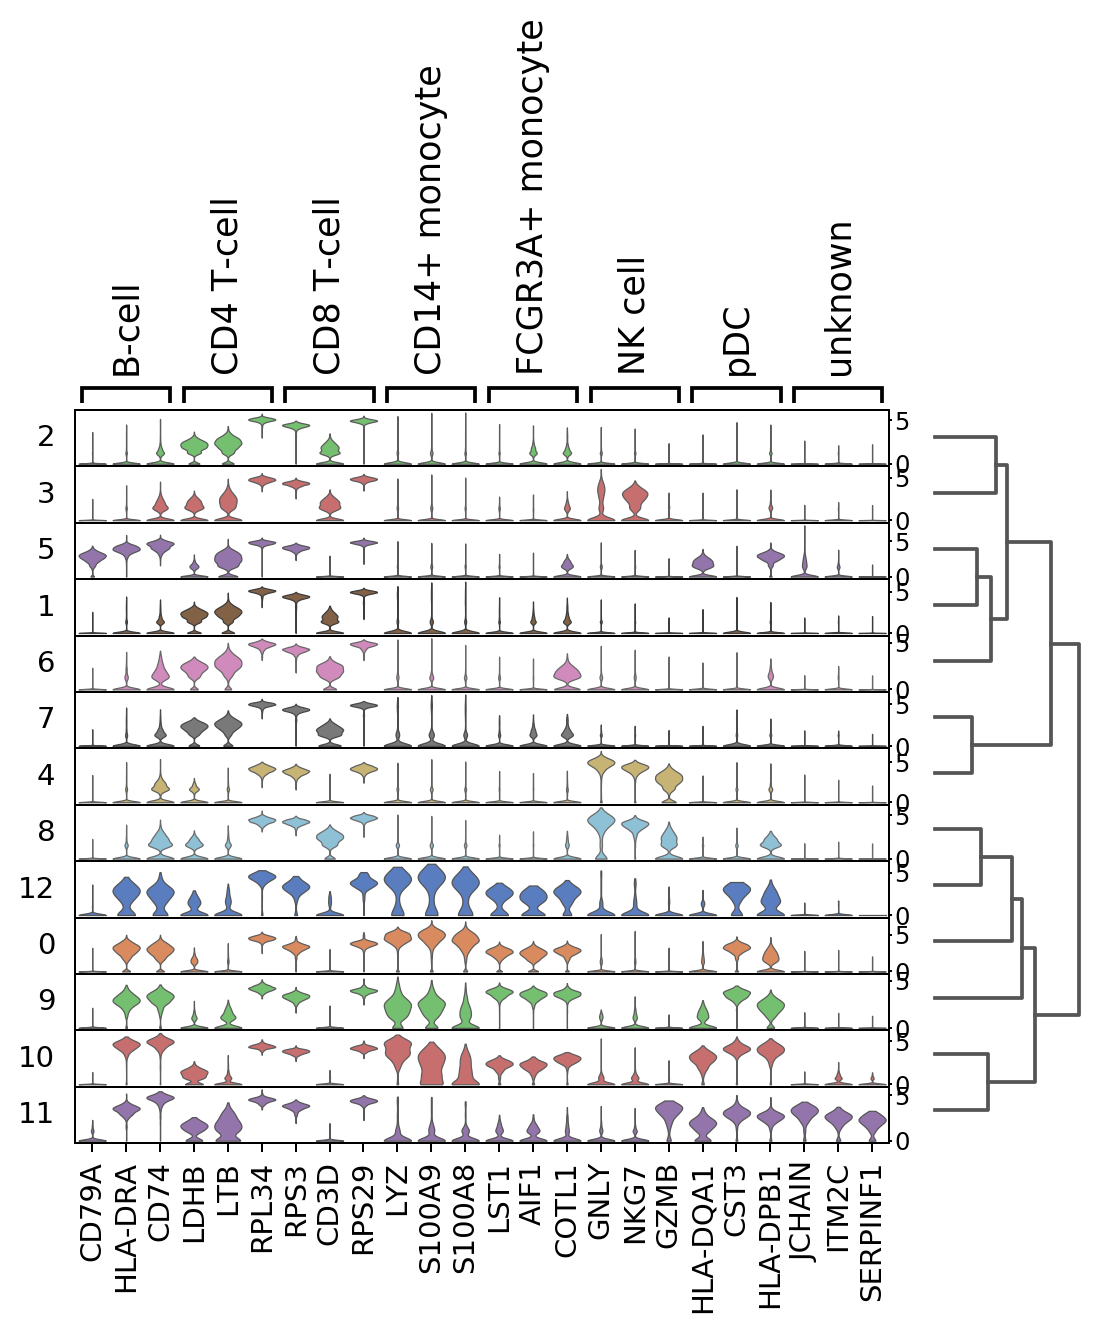

In [17]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=3, groupby='louvain')

## Celltype Quantification

In [18]:
#counts per celltype
data = bc.tl.count_occurrence(adata, add_percentage=True, count_variable='celltype')
display(data)

Counts  Percentage
CD8 T-cell          8688       31.14
CD4 T-cell          7326       26.26
CD14+ monocyte      4386       15.72
NK cell             3295       11.81
B-cell              3028       10.85
FCGR3A+ monocyte     565        2.03
pDC                  377        1.35
unknown              236        0.85

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

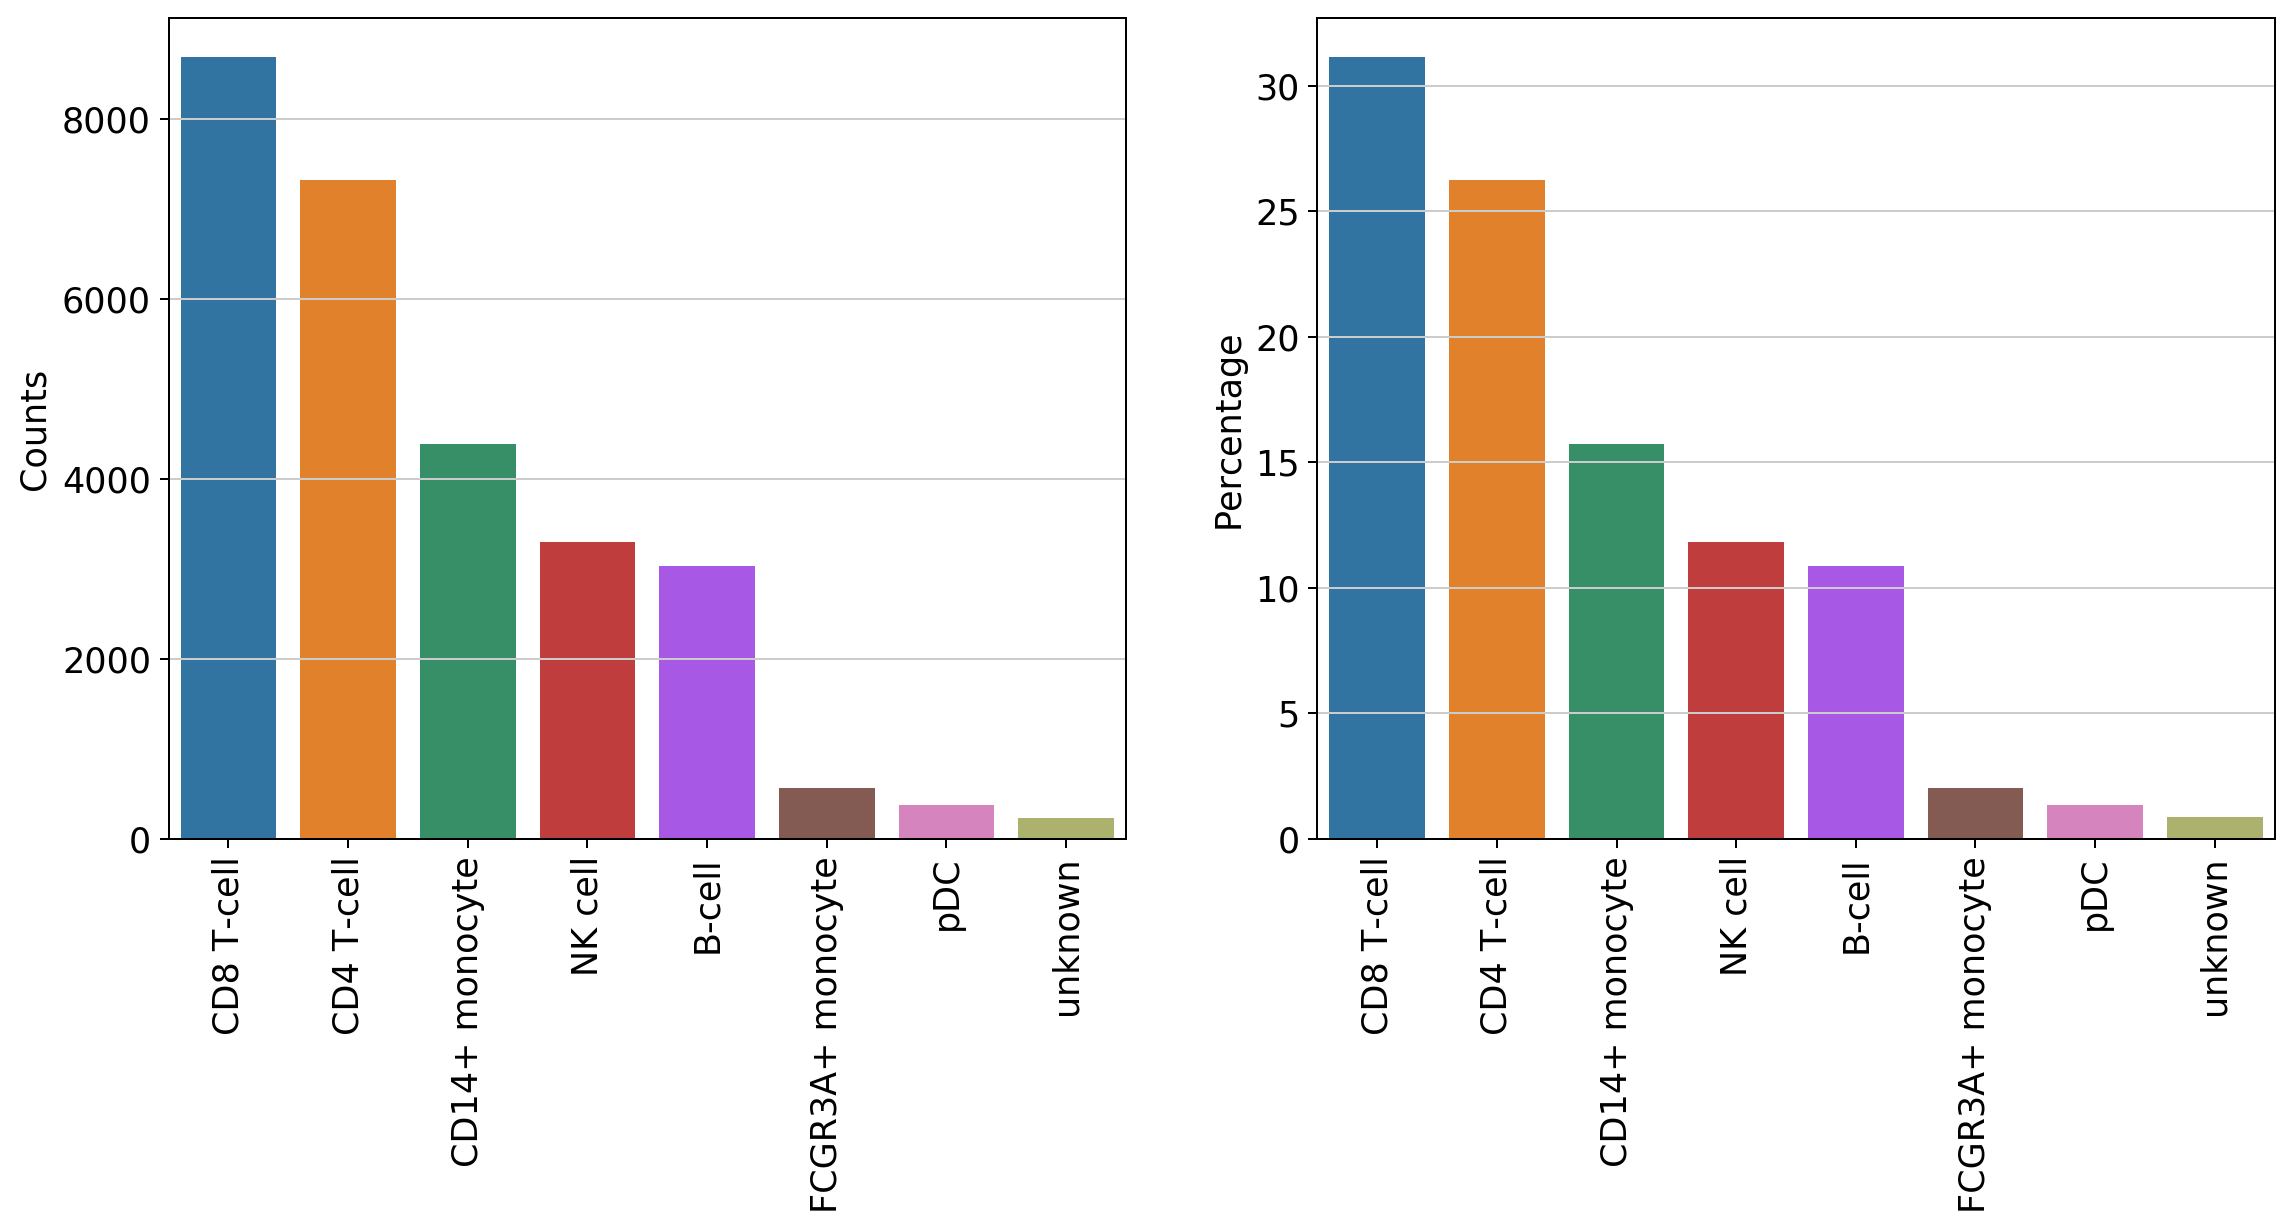

In [19]:
#generate a basic bar plot of the table above
fig = plt.figure(figsize=(15,6))

#visualize distribution before logarithmization
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(data = data, x = data.index.tolist(), y = 'Counts' )
plt.xticks(rotation=90)

#visualize distribution after logarithmization
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(data = data, x = data.index.tolist(), y = 'Percentage' )
plt.xticks(rotation=90)

In [20]:
#counts on a donor level
data = bc.tl.count_occurrence_subset(adata, count_variable='celltype', subset_variable='donor')
display(data)

Donor_3A  Donor_1  Donor_2
B-cell                1539      697      792
CD14+ monocyte        1903     1443     1040
CD4 T-cell            2901     2410     2015
CD8 T-cell            3046     2488     3154
FCGR3A+ monocyte       120      254      191
NK cell               1613      989      693
pDC                    119      121      137
unknown                 70      120       46

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

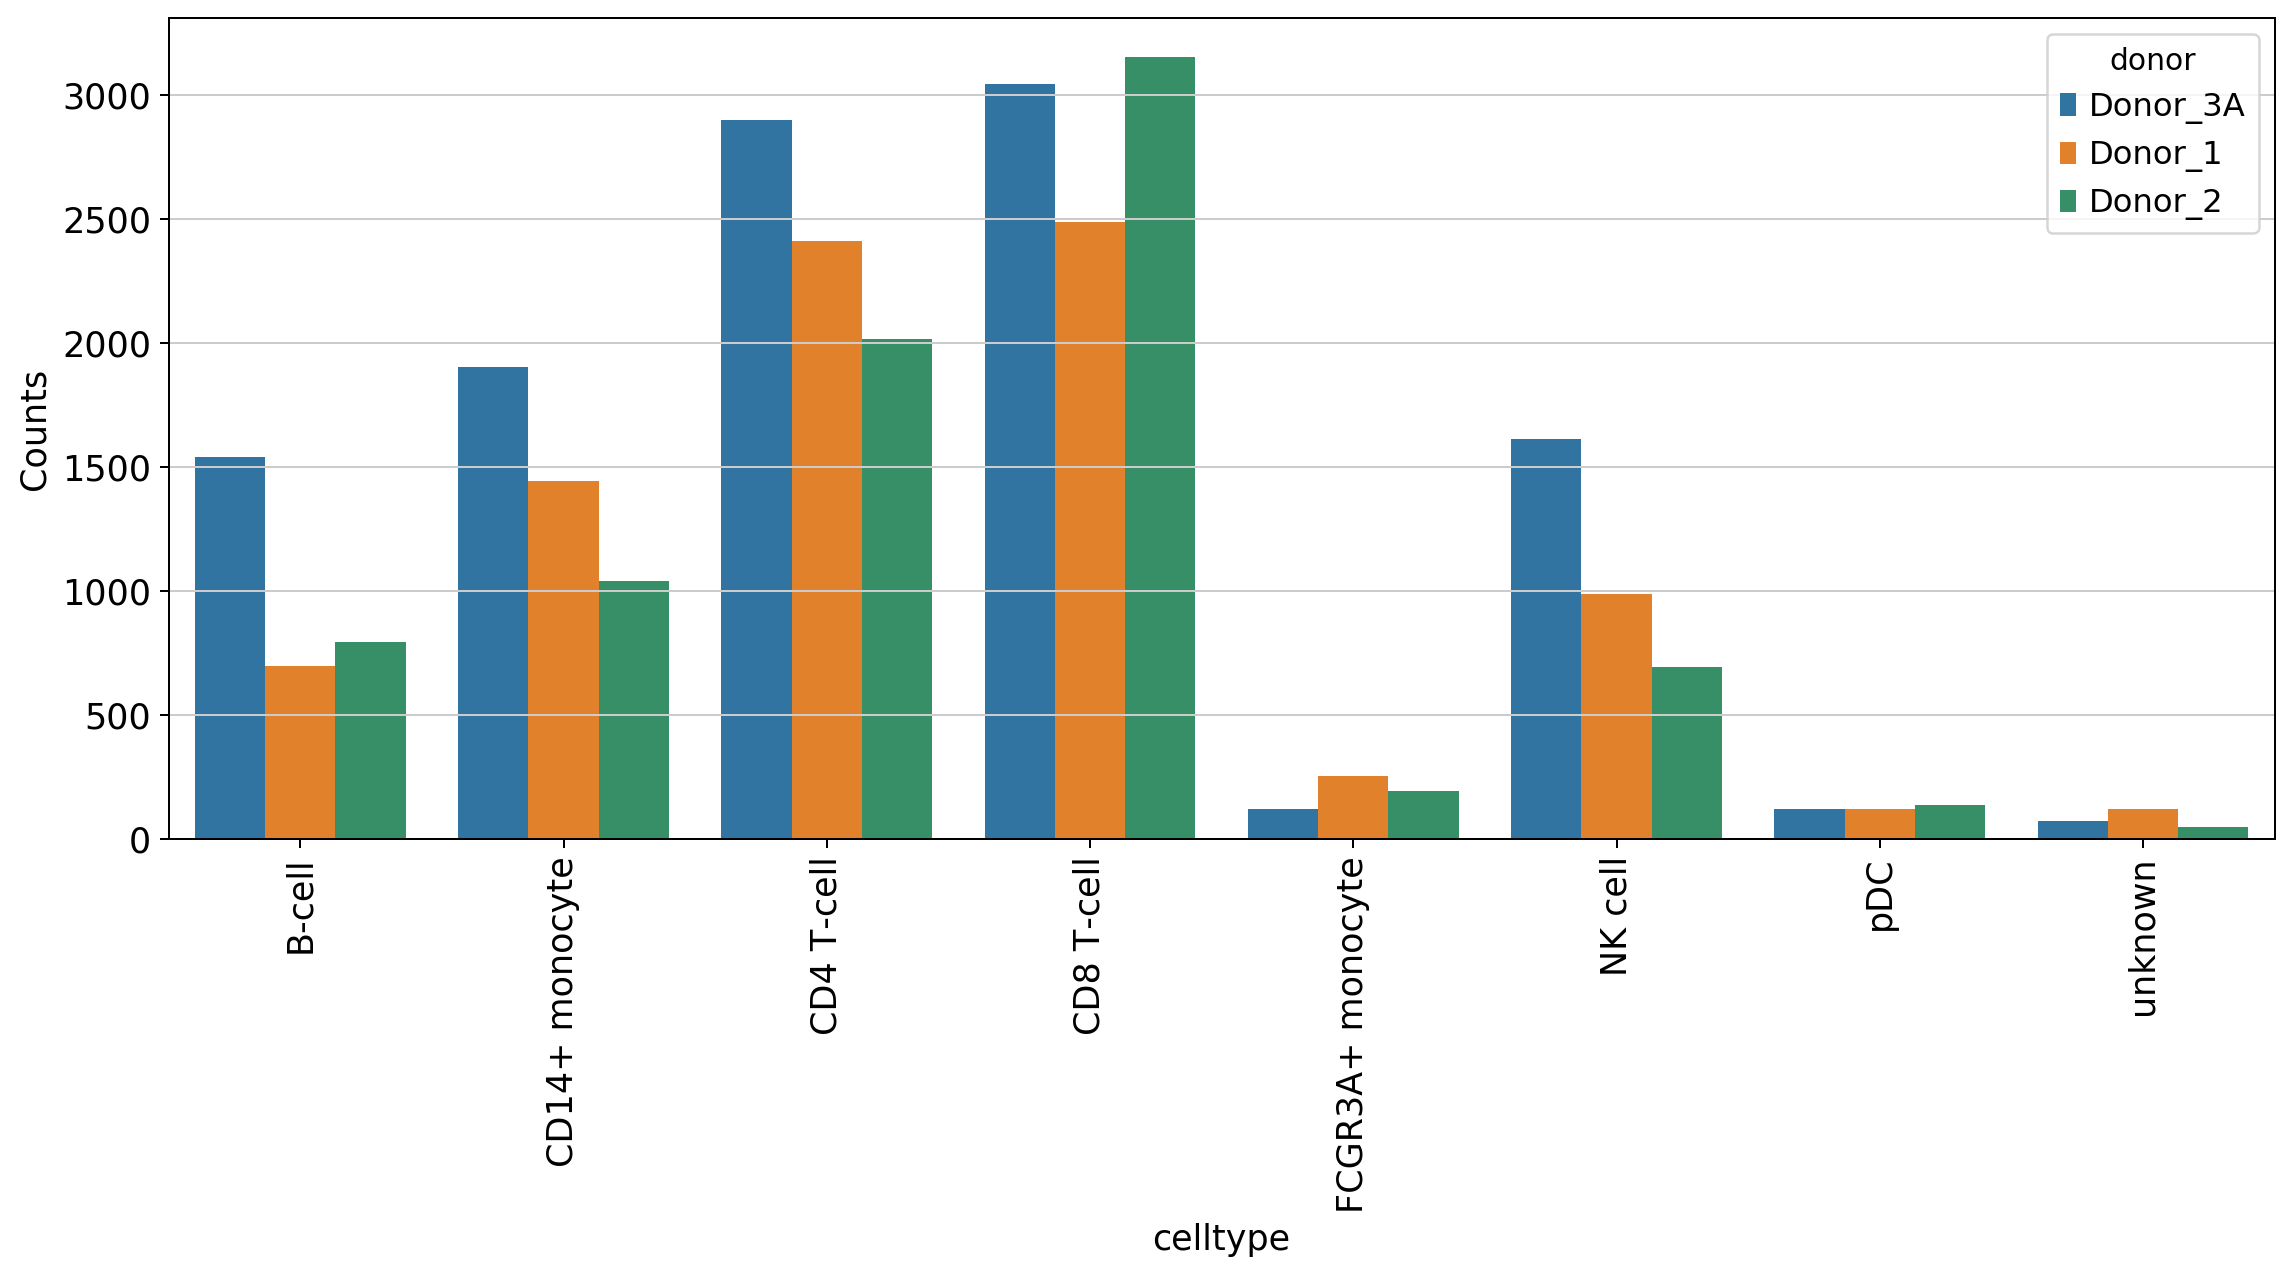

In [21]:
#make tidy for plotting
data['celltype'] = data.index.tolist() 
data_plot = data.melt(value_name='Counts', id_vars='celltype', var_name='donor')

#generate a plot
fig = plt.figure(figsize=(15,6))
sns.barplot(data=data_plot, x = 'celltype', y = 'Counts', hue='donor', dodge=True)
plt.xticks(rotation=90)

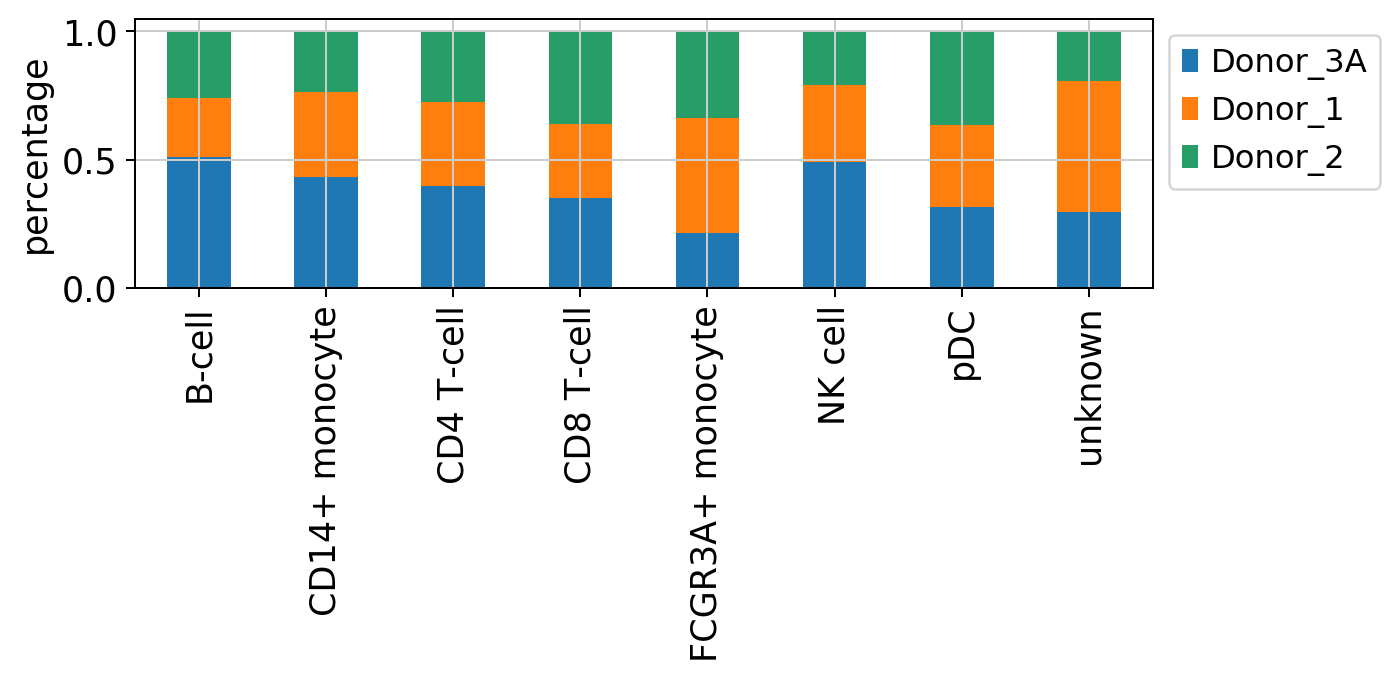

In [22]:
#stacked bar plot incorporated in besca
fig = bc.pl.celllabel_quant_stackedbar(adata, count_variable='celltype', subset_variable = 'donor');